check relation between $\mathrm{det}(GC^\top)$ and global stability

In [1]:
import torch
import mat73
import matplotlib.pyplot as plt
from pathlib import Path
import math
import matplotlib
matplotlib.rcParams.update({'font.size': 11})

In [7]:
loadEGC = mat73.loadmat("./data/EGCresultv1.mat")
egc = torch.tensor(loadEGC["egc"]).type('torch.FloatTensor')

gcrs = mat73.loadmat("./data/GCRS.mat")
G_span = torch.tensor(gcrs["G_span"]).type('torch.FloatTensor')
C_span = torch.tensor(gcrs["C_span"]).type('torch.FloatTensor')


num_rho, num_samp = egc.size()
Ns = 32
Nr = 32
num_init = 100 # different initial consitions for simulation

# for different supply
Fractions = torch.zeros(num_rho,num_samp,num_init,5)
## last dim
# 0: fraction of survival
# 1: chaos
# 2: limit cyc
# 3: alt s s
# 4: steady unstable, always 0
datapath = "./data/Jul9/"

num_task = 48
for task_id in range(num_task):
    loadF = mat73.loadmat(datapath+"DiveDyn"+str(task_id)+".mat") #Jul9 with 100 init cond and new classifier
    Fractions[[task_id,task_id+48,task_id+96]] = torch.tensor(loadF["Fractions"]).type('torch.FloatTensor')

In [5]:
Fluc = torch.mean(Fractions[:,:,:,1] + Fractions[:,:,:,2],dim=-1)
GStable = 1 - Fluc - torch.mean(Fractions[:,:,:,3], dim=-1)

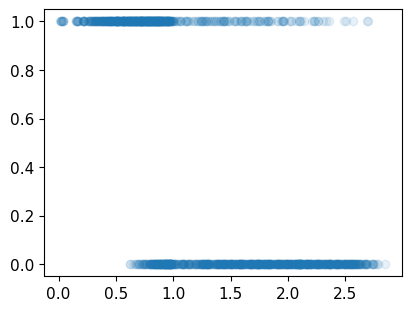

In [6]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(egc, GStable, alpha=.1)

In [54]:
GCT_span = G_span.matmul(C_span.transpose(-1,-2))
GCdet = torch.linalg.det(GCT_span)
#GCdet[GCdet > -1e-12] = 0.1

GSviaGC = GCdet.sgn()

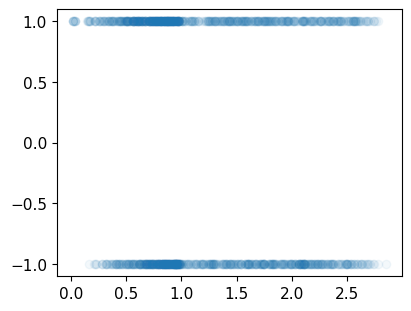

In [55]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(egc, GSviaGC, alpha=.05)

In [56]:
len(((GSviaGC == -1.0) & (GStable == 0.0) & (egc <= 1.0)).nonzero(as_tuple = True)[0])

85

In [57]:
len(((GSviaGC == 1.0) & (GStable == 1.0) & (egc <= 1.0)).nonzero(as_tuple = True)[0])

320

In [58]:
len(((GStable == 0.0) & (egc <= 1.0)).nonzero(as_tuple = True)[0])

153